In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kgpy.observatories import aia
import astropy.time
import astropy.units as u

%reload_ext autoreload
%autoreload 2
%matplotlib notebook

# Shot Noise Test

Take a well exposed AIA image as "truth" and introduce poisson noise for a given mean photon values in order to visual
inspect the appearance of shot noise.

In [2]:
times = ['2014-09-30T18:10:00.0','2014-09-30T18:11:00.0']
t = astropy.time.Time(times, format='isot', scale='utc')

aia_304 = aia.AIA.from_time_range(t[0],t[1], channels= [30.4 * u.nm],
                                  user_email= 'jacobdparker@gmail.com')


Export request pending. [id=JSOC_20201209_733, status=2]
Waiting for 0 seconds...
6 URLs found for download. Full request totalling 48MB


60.196108059969966


<IPython.core.display.Javascript object>


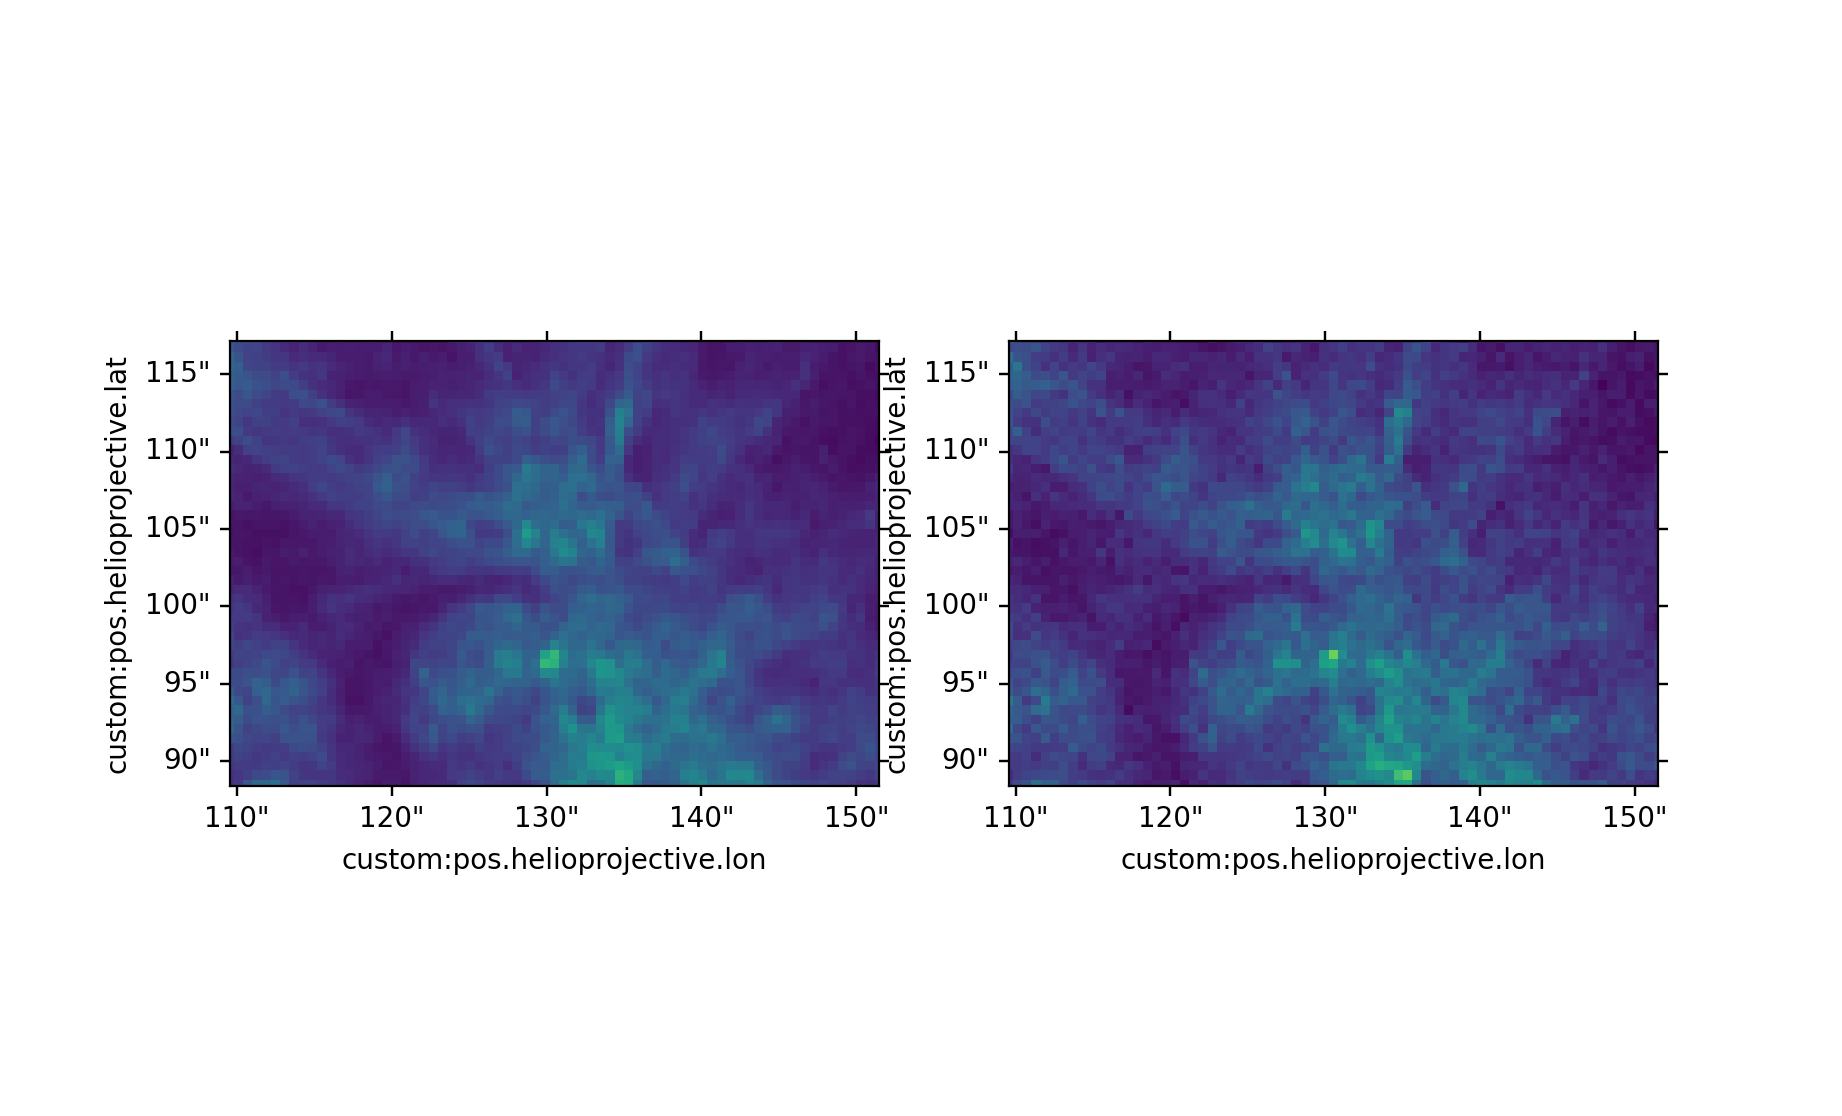

60.196108059969966


In [5]:
sl = (slice(2150,2300),slice(2200,2350))

aia_304_img = aia_304.intensity[0,0,sl[0],sl[1]].value
print(aia_304_img.mean())
aia_304_img[aia_304_img == np.nan] = 0
aia_304_img[aia_304_img < 0] = 0
fig,axs = plt.subplots(1,2,sharex = True, sharey = True, subplot_kw= dict(projection = aia_304.wcs[0,0].slice((sl[0],sl[1]))))
axs[0].imshow(aia_304_img, vmax = np.percentile(aia_304_img,99.9))

print(aia_304_img.mean())
aia_304_test = aia_304_img* 50/aia_304_img.mean()

noise = np.random.poisson(aia_304_test )
#fig, ax = plt.subplots(subplot_kw= dict(projection = aia_304.wcs[0,0].slice((sl[0],sl[1]))))
axs[1].imshow(noise, vmax = np.percentile(noise,99.9))
